In [32]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA
#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
import matplotlib.ticker as mtick
from IPython.display import display
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from collections import Counter


In [33]:
#import dataset
data = pd.read_csv('banking_churn.csv')

In [34]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [36]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [37]:
#Detect missing data
print(data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [38]:
#Identifying unique values
data.loc[(data['Gender'] != 'Female') & (data['Gender'] != 'Male')]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [8]:
#Check target variable distribution
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Exploratory Data Analysis

Predictors


In [9]:
#Age
#Detecting outliers
upper_lim = data['Age'].quantile(.95)
lower_lim = data['Age'].quantile(.05)

no_outliers = data[(data['Age'] < upper_lim) & (data['Age'] > lower_lim)]
no_outliers

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
upper_lim

60.0

In [11]:
lower_lim

25.0

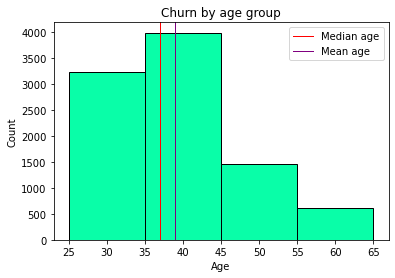

In [12]:
#hist age
ids = data['RowNumber']
age = data['Age']
median_age = np.median(age)
mean_age = round(np.mean(age))
bins = [25, 35, 45, 55, 65]
plt.hist(age, bins=bins, 
         edgecolor='black',
         color= '#09fea8',
         #log = True
        )
plt.axvline(median_age, color='red', label='Median age', linewidth=1)
plt.axvline(mean_age, color='purple', label='Mean age', linewidth=1)
plt.title('Churn by age group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

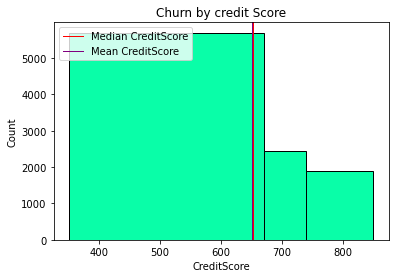

In [16]:
#hist credit score
ids = data['RowNumber']
CreditScore = data['CreditScore']
median_CreditScore = np.median(CreditScore)
mean_CreditScore = round(np.mean(CreditScore))
bins = [350, 670, 740, 850]
plt.hist(CreditScore, bins=bins, 
         edgecolor='black',
         color= '#09fea8',
         #log = True
        )
plt.axvline(median_CreditScore, color='red', label='Median CreditScore', linewidth=1)
plt.axvline(mean_CreditScore, color='purple', label='Mean CreditScore', linewidth=1)
plt.title('Churn by credit Score')
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.legend()
plt.show()

In [17]:
#Drop unnecessary columns
data.drop(columns=['Surname', 'CustomerId', 'RowNumber', 'Balance'],inplace=True)

In [18]:
#Convert object dtype to category dtype for feature processing
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = data[i].astype('category')

data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

In [19]:
# encoding without target
df_a = data
y_a = df_a['Exited']
x_a = df_a.drop(columns=['Exited'])
x_a.head(3)

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,1,1,1,101348.88
1,608,Spain,Female,41,1,1,0,1,112542.58
2,502,France,Female,42,8,3,1,0,113931.57


In [20]:
# Pre-requisite: train test split to avoid data leakage
x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x_a, y_a, test_size=0.3, random_state=1)

In [21]:
#Model Selection
le = LabelEncoder()
gender_le = le.fit_transform(x_a_train.Gender)

#Option 2: LabelBinarizer (applied to 2 categories per variable only)
bn = LabelBinarizer()

gender_bn = np.array(x_a_train.Gender).reshape(-1,1)
gender_bn = bn.fit_transform(gender_bn)

#Apply to x_train and x_test

x_a_train.loc[:, 'Gender'] = le.fit_transform(x_a_train.loc[:, 'Gender'])

x_a_test.loc[:, 'Gender'] = le.fit_transform(x_a_test.loc[:, 'Gender'])

In [22]:
x_a_train.head()

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2228,644,France,0,37,8,2,1,0,20968.88
5910,481,France,0,39,6,1,1,1,24677.54
1950,680,France,0,37,10,1,1,0,81776.84
2119,690,France,1,29,5,2,1,0,108577.97
5947,656,France,0,45,7,1,1,1,199392.14


In [23]:
onehot = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')
nominal = onehot.fit_transform(x_a_train[['Geography']])
df_nominal = pd.DataFrame(index=x_a_train.index, data=nominal, columns=onehot.get_feature_names(['Geography']))
x_a_train = pd.concat([x_a_train, df_nominal], axis=1)
x_a_train.head().T

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,2228,5910,1950,2119,5947
CreditScore,644,481,680,690,656
Geography,France,France,France,France,France
Gender,0,0,0,1,0
Age,37,39,37,29,45
Tenure,8,6,10,5,7
NumOfProducts,2,1,1,2,1
HasCrCard,1,1,1,1,1
IsActiveMember,0,1,0,0,1
EstimatedSalary,20968.88,24677.54,81776.84,108577.97,199392.14
Geography_Germany,0.0,0.0,0.0,0.0,0.0


In [24]:
x_a_train.drop(columns=['Geography'], inplace=True)
x_a_train.head().T

,2228,5910,1950,2119,5947
CreditScore,644.00,481.00,680.00,690.00,656.00
Gender,0.00,0.00,0.00,1.00,0.00
Age,37.00,39.00,37.00,29.00,45.00
Tenure,8.00,6.00,10.00,5.00,7.00
NumOfProducts,2.00,1.00,1.00,2.00,1.00
HasCrCard,1.00,1.00,1.00,1.00,1.00
IsActiveMember,0.00,1.00,0.00,0.00,1.00
EstimatedSalary,20968.88,24677.54,81776.84,108577.97,199392.14
Geography_Germany,0.00,0.00,0.00,0.00,0.00
Geography_Spain,0.00,0.00,0.00,0.00,0.00


In [25]:
nominal_test = onehot.fit_transform(x_a_test[['Geography']])
df_nominal_test = pd.DataFrame(index=x_a_test.index, data=nominal_test, columns=onehot.get_feature_names(['Geography']))
x_a_test = pd.concat([x_a_test, df_nominal_test], axis=1)
x_a_test.drop(columns=['Geography'], inplace=True)
x_a_test.head()

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
9953,550,1,47,2,2,1,1,97057.28,0.0,0.0
3850,680,1,34,3,1,1,0,66526.01,0.0,0.0
4962,531,0,42,2,2,0,1,90537.47,0.0,0.0
3886,710,1,34,8,2,0,1,1561.58,1.0,0.0
5437,543,1,30,6,1,1,1,176692.65,1.0,0.0


(array([694., 669., 713., 714., 721., 702., 692., 705., 693., 697.]),
 array([9.17500000e+01, 2.00796490e+04, 4.00675480e+04, 6.00554470e+04,
        8.00433460e+04, 1.00031245e+05, 1.20019144e+05, 1.40007043e+05,
        1.59994942e+05, 1.79982841e+05, 1.99970740e+05]),
 <BarContainer object of 10 artists>)

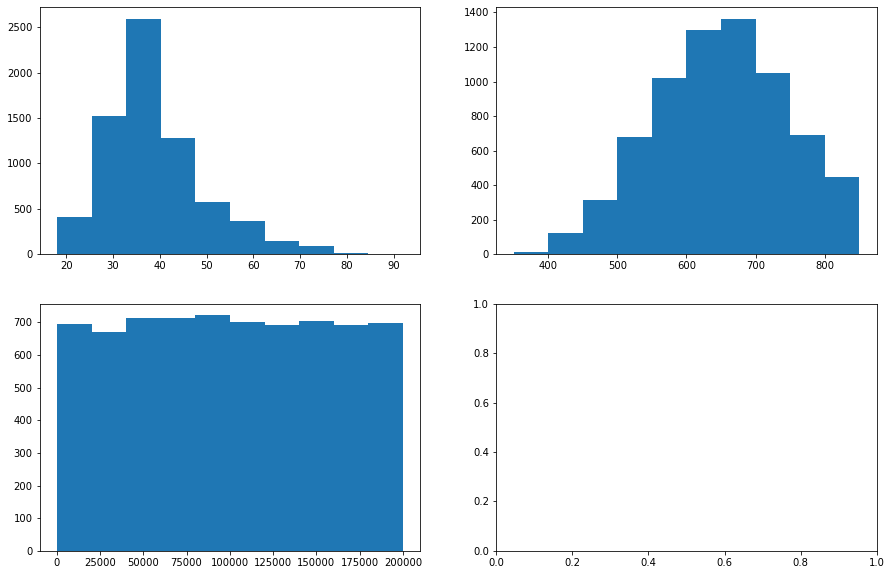

In [26]:
#2.1.3. Continuous variables:EstimatedSalary, age, CreditScore

fig, ax = plt.subplots(2,2,figsize=(15,10))

ax[0][0].hist(x_a_train.Age)
ax[0][1].hist(x_a_train.CreditScore)
ax[1][0].hist(x_a_train.EstimatedSalary)

In [44]:
#Apply to x_train set

x_a_train['age_binned'] = pd.qcut(x_a_train.Age, q=[0, .25, .50, .75, 1], duplicates='drop')
x_a_train['EstimatedSalary_binned'] = pd.qcut(x_a_train.EstimatedSalary, q=[0, .25, .50, .75, 1], duplicates='drop')
x_a_train['CreditScore_binned'] = pd.qcut(x_a_train.CreditScore, q=[0, .25, .50, .75, 1], duplicates='drop')

x_a_train.drop(columns=['Age', 'EstimatedSalary', 'CreditScore'], inplace=True)

#Since each category is divided into 4 equal bins, we can apply Label Encoder without bias

x_a_train['Age'] = le.fit_transform(x_a_train['age_binned'])
x_a_train['EstimatedSalary'] = le.fit_transform(x_a_train['EstimatedSalary_binned'])
x_a_train['CreditScore'] = le.fit_transform(x_a_train['CreditScore_binned'])

x_a_train.drop(columns=['age_binned','EstimatedSalary_binned', 'CreditScore_binned'],inplace=True)

x_a_train.head()

,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Age,EstimatedSalary,CreditScore
2228,0,8,2,1,0,0.0,0.0,0,0,0
5910,0,6,1,1,1,0.0,0.0,0,0,0
1950,0,10,1,1,0,0.0,0.0,0,1,0
2119,1,5,2,1,0,0.0,0.0,0,2,0
5947,0,7,1,1,1,0.0,0.0,1,3,0


In [47]:
#Apply to x_test set
x_a_test['age_binned'] = pd.qcut(x_a_test.age, q=[0, .25, .50, .75, 1], duplicates='drop')
x_a_test['EstimatedSalary_binned'] = pd.qcut(x_a_test.EstimatedSalary, q=[0, .25, .50, .75, 1], duplicates='drop')
x_a_test['CreditScore_binned'] = pd.qcut(x_a_test.CreditScore, q=[0, .25, .50, .75, 1], duplicates='drop')

x_a_test.drop(columns=['age', 'EstimatedSalary', 'CreditScore'], inplace=True)

#Since each category is divided into 5 equal bins, we can apply Label Encoder without bias

x_a_test['age'] = le.fit_transform(x_a_test['age_binned'])
x_a_test['EstimatedSalary'] = le.fit_transform(x_a_test['EstimatedSalary_binned'])
x_a_test['CreditScore'] = le.fit_transform(x_a_test['CreditScore_binned'])

x_a_test.drop(columns=['age_binned','EstimatedSalary_binned', 'CreditScore_binned'],inplace=True)

In [48]:
x_a_test.head(3).T

,9953,3850,4962
Gender,1.0,1.0,0.0
Tenure,2.0,3.0,2.0
NumOfProducts,2.0,1.0,2.0
HasCrCard,1.0,1.0,0.0
IsActiveMember,1.0,0.0,1.0
Geography_Germany,0.0,0.0,0.0
Geography_Spain,0.0,0.0,0.0
age,2.0,0.0,1.0
EstimatedSalary,1.0,1.0,1.0
CreditScore,0.0,1.0,0.0


In [49]:
#Feature Scaling (Data Standardization/Normalization)
#encoded without target
ss = StandardScaler()
ss_train = ss.fit_transform(x_a_train)
x_a_train_ss = pd.DataFrame(ss_train)
x_a_train_ss.columns=x_a_train.columns
x_a_train_ss.head()

#Test
ss_test = ss.fit_transform(x_a_test)
x_a_test_ss = pd.DataFrame(ss_test)
x_a_test_ss.columns=x_a_test.columns
x_a_test_ss.head()

,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,age,EstimatedSalary,CreditScore
0,0.893622,-1.015951,0.829642,0.655693,0.944852,-0.567599,-0.576324,1.546599,-0.447214,-0.901833
1,0.893622,-0.672802,-0.903593,0.655693,-1.058367,-0.567599,-0.576324,-0.892832,-0.447214,0.304364
2,-1.119041,-1.015951,0.829642,-1.525104,0.944852,-0.567599,-0.576324,0.326884,-0.447214,-0.901833
3,0.893622,1.042946,0.829642,-1.525104,0.944852,1.761808,-0.576324,-0.892832,-1.341641,0.304364
4,0.893622,0.356647,-0.903593,0.655693,0.944852,1.761808,-0.576324,-0.892832,1.341641,-0.901833


In [50]:
# Dealing with imbalanced data (Random Undersampling / Oversampling (SMOTE))

#the same for both df_a and df_b set

a_target_0 = df_a[df_a.Exited == 0].Exited.count() / df_a.Exited.count()
a_target_1 = df_a[df_a.Exited == 1].Exited.count() / df_a.Exited.count()

print(a_target_0)
print(a_target_1)

0.7963
0.2037


In [51]:
# Oversampling (SMOTE: Synthetic Minority Oversampling Technique)

oversample = SMOTE()

x_a_train_ss_over, y_a_train_over = oversample.fit_resample(x_a_train_ss, y_a_train)
print(Counter(y_a_train_over))

Counter({0: 5590, 1: 5590})


In [52]:
#Apply to x_test_set
x_a_test_ss_over, y_a_test_over = oversample.fit_resample(x_a_test_ss, y_a_test)
print(Counter(y_a_test_over))

Counter({0: 2373, 1: 2373})


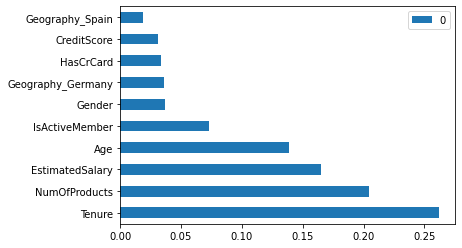

In [53]:
#Feature Importance

#Test on df_a set first


fi = ExtraTreesClassifier()
fi_a = fi.fit(x_a_train_ss_over, y_a_train_over)

df_fi_a = pd.DataFrame(fi_a.feature_importances_,index=x_a_train_ss_over.columns)
df_fi_a.nlargest(10,df_fi_a.columns).plot(kind='barh')
plt.show()

Gender              -0.134309
Geography_Spain     -0.058911
NumOfProducts       -0.054338
CreditScore         -0.035157
HasCrCard           -0.007632
Tenure               0.006748
EstimatedSalary      0.010032
Geography_Germany    0.207935
Age                  0.411604
Exited               1.000000
Name: Exited, dtype: float64


<AxesSubplot:>

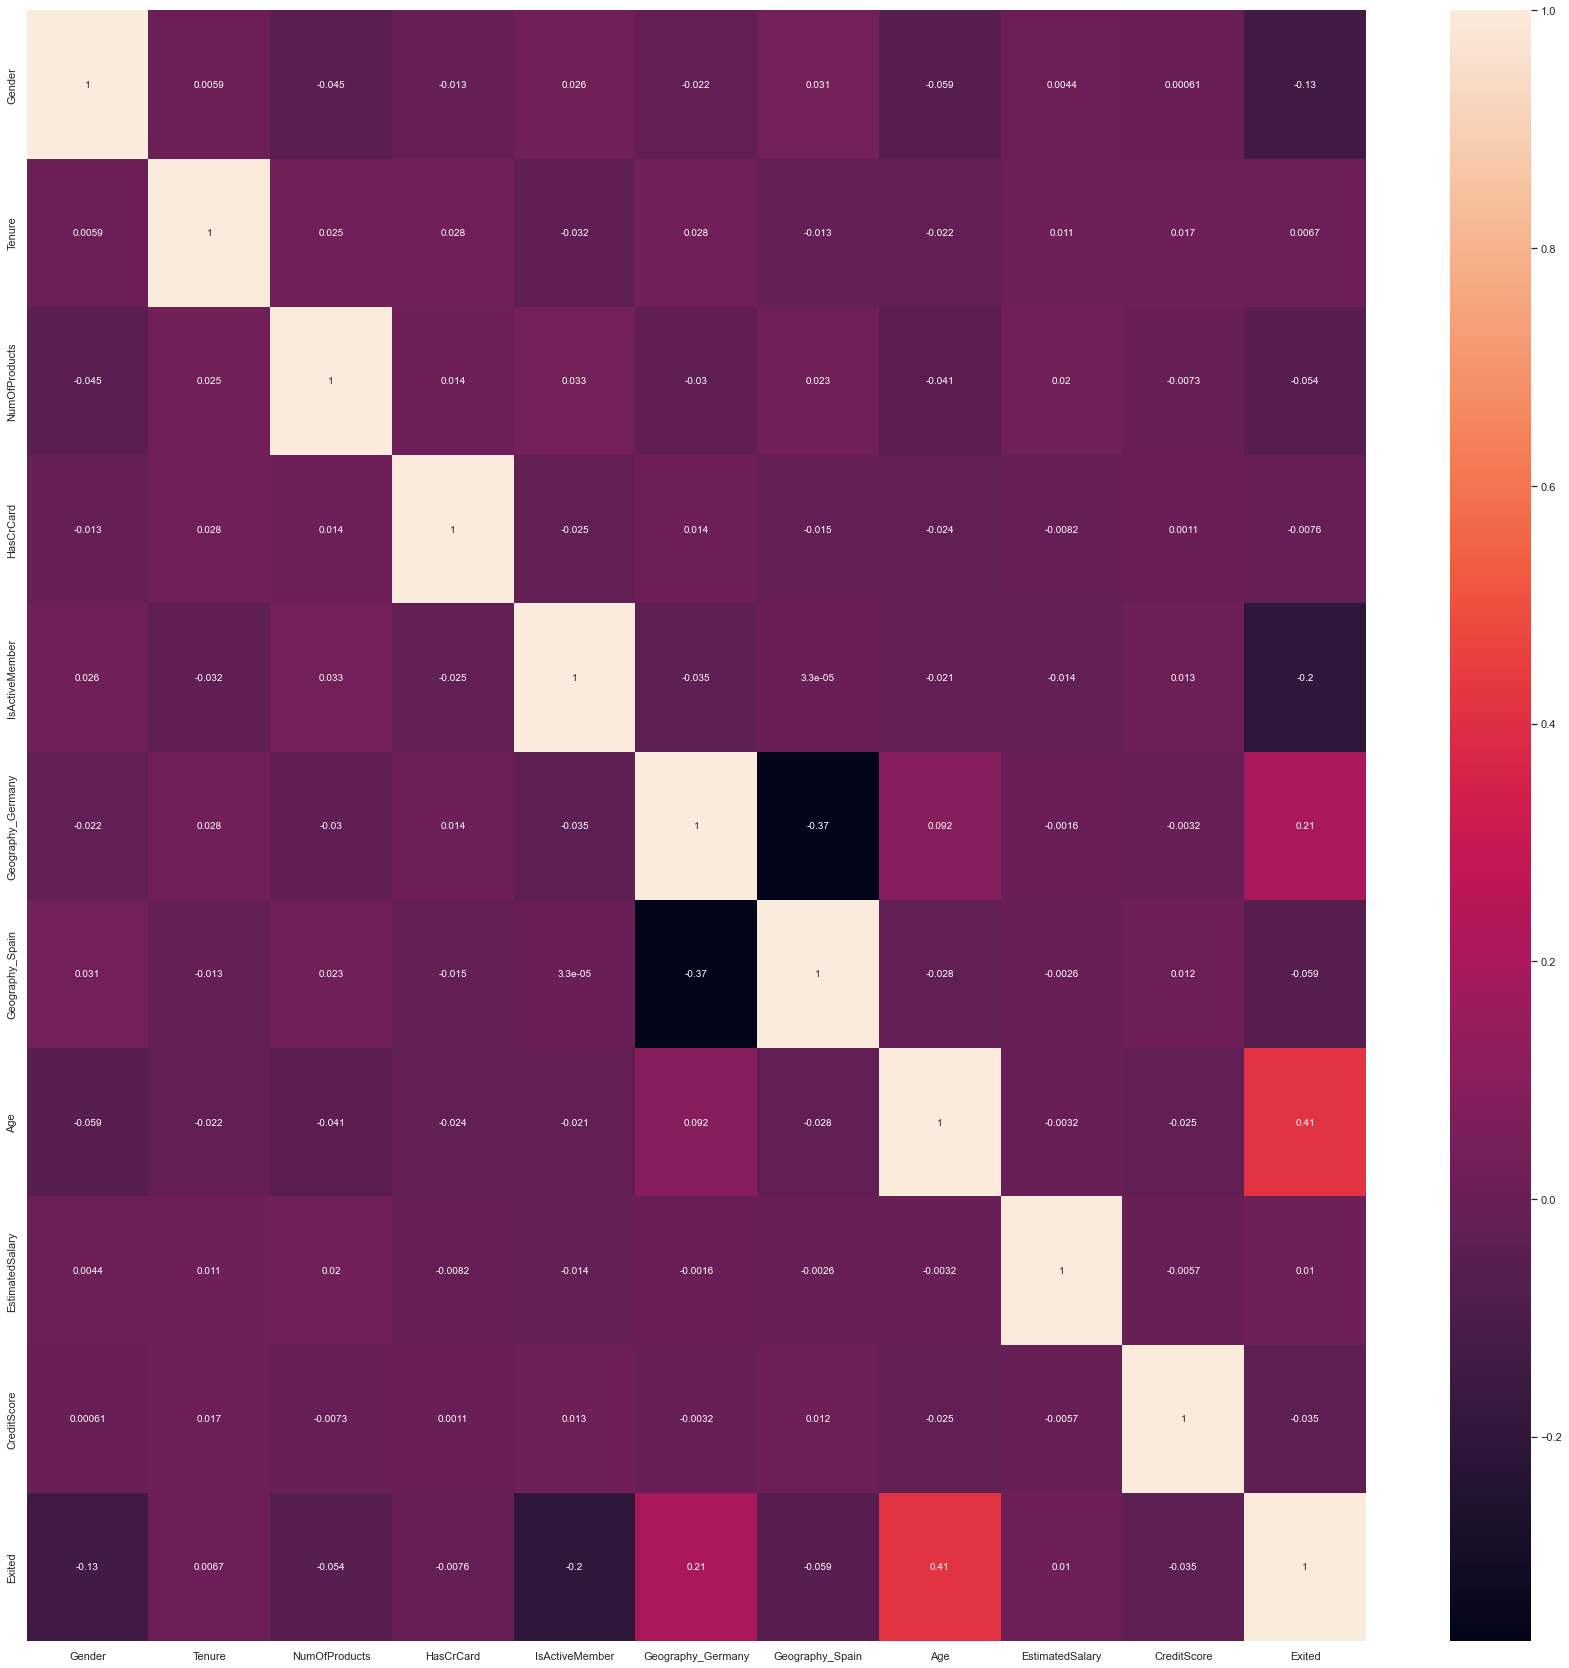

In [170]:
#Correlation Matrix

# Test on df_a set

df_a_train_processed = pd.concat([x_a_train_ss_over, y_a_train_over], axis=1) #combine processed features with their target

cm_a = df_a_train_processed.corr()

print(cm_a.Exited.sort_values().tail(10))

plt.figure(figsize=(30,30))
sns.heatmap(cm_a, xticklabels=df_a_train_processed.columns, yticklabels=df_a_train_processed.columns,annot=True)

10


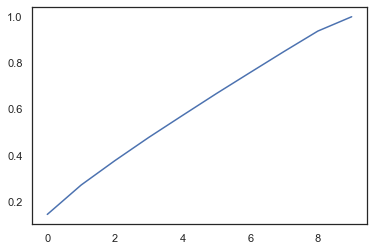

,0,1,2,3,4,5,6,7,8,9
0,0.500479,1.007828,-0.483272,-1.478569,0.139994,-0.947069,0.641111,1.605696,-0.701477,-0.778377
1,-0.090920,-0.612834,0.327698,-0.150086,0.953444,-1.584256,0.087197,0.384578,-1.512070,-0.742597
2,0.040164,-0.491718,-1.018561,-1.915828,0.535444,0.396136,0.607646,0.836219,-1.126177,-0.803006
3,0.739557,0.633463,-1.394745,-0.580701,-0.563653,0.124032,0.032409,-0.122539,1.008924,-0.859691
4,-0.355419,-0.514578,0.924576,-0.431118,0.454141,0.507486,-0.321212,-1.840373,-1.457428,-0.881672


In [172]:
#5.3.1. PCA on df_a set

df_a_train_processed.shape

pca = PCA(.95)

pca_a_train = pca.fit(x_a_train_ss_over, y_a_train_over)
print(pca_a_train.n_components_)

plt.plot(np.cumsum(pca_a_train.explained_variance_ratio_))
plt.show()

x_a_train_ss_over_pca = pd.DataFrame(pca_a_train.transform(x_a_train_ss_over))
x_a_train_ss_over_pca.head()

In [173]:
#Apply PCA on x_test set

pca_a_test = pca.fit(x_a_test_ss_over, y_a_test_over)
print(pca_a_test.n_components_)

x_a_test_ss_over_pca = pd.DataFrame(pca_a_test.transform(x_a_test_ss_over))
x_a_test_ss_over_pca.head()

10


,0,1,2,3,4,5,6,7,8,9
0,0.254475,0.464716,0.428077,-1.111552,-1.109386,-1.993143,0.319020,-0.209067,-0.635066,-0.806177
1,-0.207021,-1.020816,1.397731,-0.501760,0.457905,0.232493,0.488048,-0.053624,0.854101,-0.711150
2,0.645156,0.880458,-0.799586,0.805688,-0.486757,-1.744552,-0.463930,1.450976,-0.149264,-0.937757
3,-0.809266,1.928175,1.212260,1.486093,-0.952150,0.700539,0.693332,0.937007,-0.829226,0.642800
4,-1.091120,0.279307,0.817505,-0.674959,-1.942502,0.543255,-1.812261,-0.045535,0.962504,1.203250


In [174]:
# Apply algorithm 
# Models to be tested: L ogistic Regression, KNearest, SVM, Decision Tree, Random Forest, XGBoost, LightGBM
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()
}

In [175]:
%%time
#Compute the training score of each models

train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_a_train_ss_over_pca, y_a_train_over)
    train_score = round(classifier.score(x_a_train_ss_over_pca, y_a_train_over),2)
    train_scores.append(train_score)
    test_score = round(classifier.score(x_a_test_ss_over_pca, y_a_test_over),2)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.71, 0.89, 0.81, 0.97, 0.97]
[0.47, 0.54, 0.6, 0.52, 0.59]
Wall time: 1min 1s


In [176]:
train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_a_train_ss_over_pca, y_a_train_over)
    train_score = cross_val_score(classifier, x_a_train_ss_over_pca, y_a_train_over, cv=5)
    train_cross_scores.append(round(train_score.mean(),2))
    test_score = cross_val_score(classifier, x_a_test_ss_over_pca, y_a_test_over, cv=5)
    test_cross_scores.append(round(test_score.mean(),2))
    
print(train_cross_scores)
print(test_cross_scores)

[0.71, 0.83, 0.79, 0.81, 0.85]
[0.73, 0.83, 0.81, 0.82, 0.88]


In [178]:
rf = RandomForestClassifier()
rf.fit(x_a_train_ss_over_pca, y_a_train_over)
rf_pred = cross_val_predict(rf, x_a_test_ss_over_pca, y_a_test_over, cv=5)
print(roc_auc_score(y_a_test_over, rf_pred))

0.8769490096923725


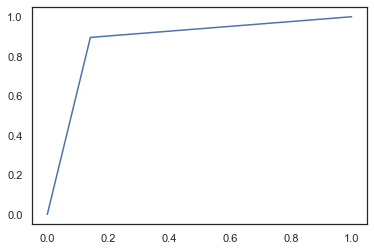

In [179]:
fpr, tpr, _ = roc_curve(y_a_test_over, rf_pred)
plt.plot(fpr, tpr)
plt.show()

In [180]:
#Modelling score has improved after removing resampling bit (on both df_a and df_b set)
#However, we have not achieved the best accuracy score as we expect (>90%)

In [181]:
#6.2. Hyperparameter Tuning

#Logistic Regression
lr = LogisticRegression()
lr_params = {"penalty": ['l2'], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_logistic = GridSearchCV(lr, lr_params)
grid_logistic.fit(x_a_train_ss_over_pca, y_a_train_over)
lr_best = grid_logistic.best_estimator_

In [182]:
lr_best

LogisticRegression(C=0.1, solver='newton-cg')

In [183]:
#KNearest Neighbors
knear = KNeighborsClassifier()
knear_params = {"n_neighbors": list(range(2,7,1)), "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brutle']}
grid_knear = GridSearchCV(knear, knear_params)
grid_knear.fit(x_a_train_ss_over_pca, y_a_train_over)
knear_best = grid_knear.best_estimator_

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "C:\Users\User\anaconda3\lib\site-packa

In [184]:
#SVC

svc = SVC()
svc_params = {"C": [0.5, 0.7, 0.9, 1], "kernel":['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(svc, svc_params)
grid_svc.fit(x_a_train_ss_over_pca, y_a_train_over)
svc_best = grid_svc.best_estimator_

In [185]:
svc_best

SVC(C=1)

In [186]:
#Decision Tree

tree = DecisionTreeClassifier()
tree_params = {"criterion": ['gini', 'entropy'], "max_depth":list(range(2,5,1)), "min_samples_leaf":list(range(5,7,1))}
grid_tree = GridSearchCV(tree, tree_params)
grid_tree.fit(x_a_train_ss_over_pca, y_a_train_over)
tree_best = grid_tree.best_estimator_

In [192]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_a_train_ss_over_pca, y_a_train_over)
xgb_train_score = cross_val_score(xgb_model, x_a_train_ss_over_pca, y_a_train_over, cv=5)
xgb_test_score = cross_val_score(xgb_model, x_a_test_ss_over_pca, y_a_test_over, cv=5)

print(round(xgb_train_score.mean(),2))
print(round(xgb_test_score.mean(),2))

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.83
0.87


In [197]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_a_train_ss_over_pca, y_a_train_over)
lgb_train_score = cross_val_score(lgb_model, x_a_train_ss_over_pca, y_a_train_over, cv=5)
lgb_test_score = cross_val_score(lgb_model, x_a_test_ss_over_pca, y_a_test_over, cv=5)

print(round(lgb_train_score.mean(),2))
print(round(lgb_test_score.mean(),2))

0.83
0.85
